In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, fbeta_score, make_scorer
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./datasets/flood.csv')

In [3]:
q25, q50, q75 = df["FloodProbability"].quantile([0.25, 0.50, 0.75]).to_numpy()

def flood_risk(p):
    if p <= q25:
        return 0
    elif p <= q75:
        return 1
    else:
        return 2

df = df.copy()
df["FloodRisk"] = df["FloodProbability"].apply(flood_risk)

X = df.drop(columns=["FloodProbability", "FloodRisk"])
y = df["FloodRisk"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

pd.Series(y_train).value_counts(normalize=True).rename("train_proportion")

FloodRisk
1    0.51460
0    0.26235
2    0.22305
Name: train_proportion, dtype: float64

In [4]:
def evaluate(model, X_test, y_test, labels=(0,1,2), title=None):
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred, labels=labels)
    cm_df = pd.DataFrame(cm, index=[f"true_{i}" for i in labels], columns=[f"pred_{i}" for i in labels])

    report = classification_report(y_test, y_pred, labels=labels, output_dict=True, zero_division=0)
    report_df = pd.DataFrame(report).T

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(i) for i in labels])
    disp.plot(values_format="d")
    if title:
        plt.title(title)
    plt.show()

    return cm_df, report_df



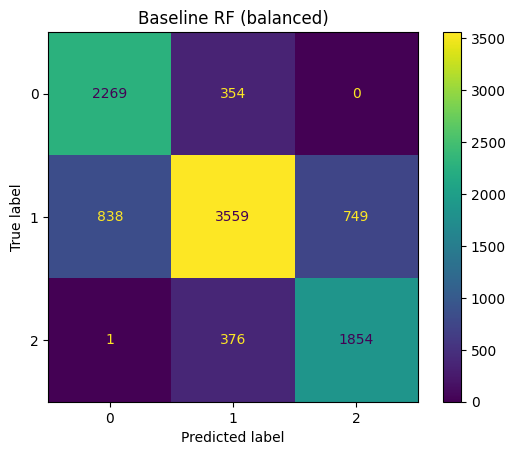

,precision,recall,f1-score,support
0,0.730051,0.865040,0.791834,2623.0000
1,0.829797,0.691605,0.754425,5146.0000
2,0.712255,0.831017,0.767067,2231.0000
accuracy,0.768200,0.768200,0.768200,0.7682
macro avg,0.757368,0.795888,0.771109,10000.0000
weighted avg,0.777410,0.768200,0.767058,10000.0000


In [5]:
rf_base = RandomForestClassifier(
    n_estimators=400,
    max_depth=12,
    min_samples_leaf=15,
    max_features="sqrt",
    random_state=42,
    class_weight="balanced",
    n_jobs=-1
)

rf_base.fit(X_train, y_train)

cm_base, rep_base = evaluate(rf_base, X_test, y_test, title="Baseline RF (balanced)")
rep_base
